In [28]:
# Librerias para el problema

import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Leer los datos

datos = pd.read_csv('/content/drive/MyDrive/Kavak/data-2023-08-02.csv')

<ipython-input-2-1b6139c25be0>:1: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  datos = pd.read_csv('/content/drive/MyDrive/Kavak/data-2023-08-02.csv')


# Pregunta 2.	Identifica los delitos que van al alza y a la baja en la CDMX (ten cuidado con los delitos con pocas ocurrencias).

In [25]:
#datos['delito'].unique() # Esta columna ayuda a conocer todos los delitos clasificados en el dataset

In [26]:
#datos['delito'].value_counts() # Esta columna ayuda a conocer la cantidad de delitos en el dataset, donde se indican por ejemplo delitos unicos

In [66]:
# Para saber si los delitos van a la alza o a la baja se realiza lo siguiente:
datos_corregidos = datos[datos['ao_hechos'] >= 2016] # Eliminar datos incorrectos

delito_por_año = datos_corregidos.groupby(['ao_hechos','delito']).size().reset_index(name='ocurrencias') # Agrupar los delitos por año

delito_por_año['cambio por año'] = delito_por_año.groupby('delito')['ocurrencias'].pct_change() * 100  # Definir el cambio porcentual del delito

# Eliminar los delitos con un minimo de ocurrencias ya que el cambio por ejemplo de 1 a 2 no podria exactamente ser una alza si no la presencia del delito de forma puntual

min_ocurrencias = 10  # En este caso tomo como delitos puntuales los que no se presentan mas de 10 por año
delitos_filtrados = delito_por_año[delito_por_año['ocurrencias'] >= min_ocurrencias]

In [67]:
delitos_al_alza = delitos_filtrados[delitos_filtrados['cambio por año'] > 0]
delitos_a_la_baja = delitos_filtrados[delitos_filtrados['cambio por año'] < 0]

In [68]:
# Imprimir los resultados , En este caso dada la gran cantidad de delitos es mejor graficarlos de acuerdo a las necesidades
print("Delitos al alza:")
delitos_al_alza

Delitos al alza:


,ao_hechos,delito,ocurrencias,cambio por año
272,2017.0,ABANDONO DE PERSONA,671,8.051530
274,2017.0,ABUSO DE AUTORIDAD,1291,3.362690
275,2017.0,ABUSO DE AUTORIDAD Y USO ILEGAL DE LA FUERZA P...,15,275.000000
276,2017.0,ABUSO DE CONFIANZA,3864,18.056829
278,2017.0,ACOSO SEXUAL,246,18.840580
...,...,...,...,...
1964,2022.0,VARIACION DE NOMBRE O DOMICILIO,20,53.846154
1967,2022.0,VIOLACION EQUIPARADA,1339,80.945946
1970,2022.0,VIOLACION TUMULTUARIA,40,25.000000
1971,2022.0,VIOLACION TUMULTUARIA EQUIPARADA,18,1700.000000


In [72]:
print("Delitos a la baja:")
delitos_a_la_baja

Delitos a la baja:


,ao_hechos,delito,ocurrencias,cambio por año
273,2017.0,ABORTO,82,-28.695652
277,2017.0,ABUSO SEXUAL,1811,-7.318321
281,2017.0,AMENAZAS,9532,-4.479407
282,2017.0,ATAQUE A LAS VIAS DE COMUNICACION (DAÑO A VIAS...,22,-77.777778
290,2017.0,COHECHO,238,-4.032258
...,...,...,...,...
2231,2023.0,VIOLACION,200,-73.684211
2233,2023.0,VIOLACION EQUIPARADA,408,-69.529500
2235,2023.0,VIOLACION TUMULTUARIA,12,-70.000000
2236,2023.0,VIOLACION TUMULTUARIA EQUIPARADA,13,-27.777778


# Pregunta 3.	¿Cuál es la alcaldía que más delitos tiene y cuál es la que menos? ¿Por qué crees que sea esto?

In [70]:
delitos_por_alcaldia = datos_corregidos.groupby('alcaldia_hechos').size().reset_index(name='total_delitos')

# Encontrar la alcaldía con más delitos
alcaldia_mas_delitos = delitos_por_alcaldia.loc[delitos_por_alcaldia['total_delitos'].idxmax()]

# Encontrar la alcaldía con menos delitos
alcaldia_menos_delitos = delitos_por_alcaldia.loc[delitos_por_alcaldia['total_delitos'].idxmin()]

# Imprimir los resultados
print("Alcaldía con más delitos:", alcaldia_mas_delitos['alcaldia_hechos'], "con un total de", alcaldia_mas_delitos['total_delitos'], "delitos")
#print("Alcaldía con menos delitos:", alcaldia_menos_delitos['alcaldia_hechos'], "con un total de", alcaldia_menos_delitos['total_delitos'], "delitos")

Alcaldía con más delitos: CUAUHTEMOC con un total de 251561 delitos


In [71]:
delitos_por_alcaldiaS.sort_values(by='total_delitos', ascending=False) # Encontrar la alcaldia que realmente tiene la menor cantidad de delitos

,alcaldia_hechos,total_delitos
6,CUAUHTEMOC,251561
10,IZTAPALAPA,246274
8,GUSTAVO A. MADERO,167440
2,BENITO JUAREZ,131717
4,COYOACAN,112389
0,ALVARO OBREGON,112352
12,MIGUEL HIDALGO,104584
15,TLALPAN,98136
16,VENUSTIANO CARRANZA,94983
1,AZCAPOTZALCO,80713


# Pregunta 4. Existe alguna tendencia estacional en la ocurrencia de delitos (mes, semana, día de la semana, quincenas) en la CDMX? ¿A qué crees que se deba?

<ipython-input-44-939dca798f2c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos_corregidos['fecha'] = pd.to_datetime(datos_corregidos['fecha_inicio'])
<ipython-input-44-939dca798f2c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos_corregidos['mes'] = datos_corregidos['fecha'].dt.month


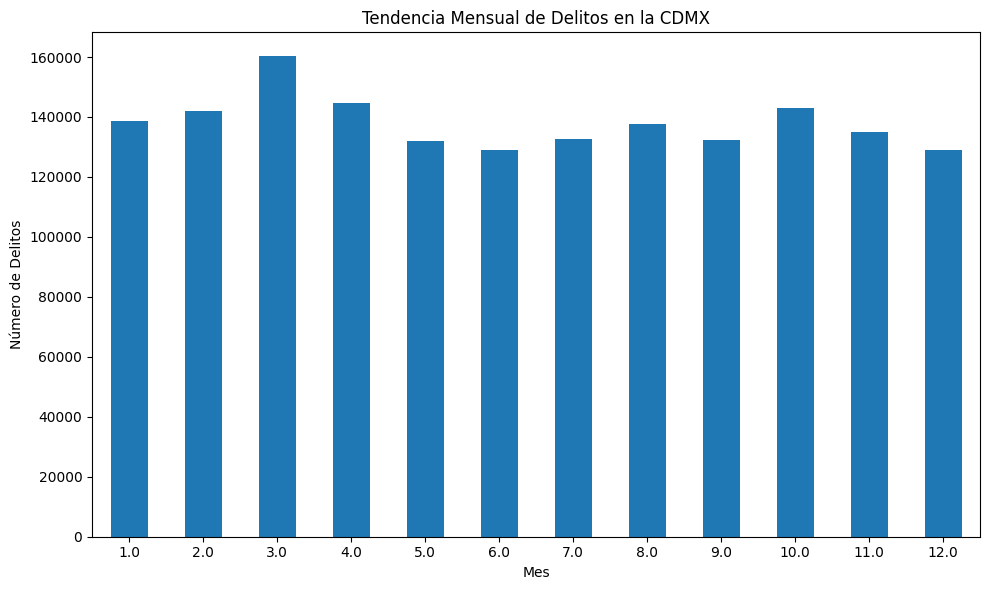

In [44]:
# Como ejemplo veremos la estacionalidad por mes

# Convertir la columna de fecha a tipo datetime
datos_corregidos['fecha'] = pd.to_datetime(datos_corregidos['fecha_inicio'])

# Crear una columna adicional para el mes
datos_corregidos['mes'] = datos_corregidos['fecha'].dt.month

# Agrupar los delitos por mes y contar las ocurrencias
delitos_por_mes = datos_corregidos.groupby('mes').size()

# Graficar la tendencia mensual
plt.figure(figsize=(10, 6))
delitos_por_mes.plot(kind='bar')
plt.title('Tendencia Mensual de Delitos en la CDMX')
plt.xlabel('Mes')
plt.ylabel('Número de Delitos')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

<ipython-input-45-e232d68cdaf4>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos_corregidos['dia_semana'] = datos_corregidos['fecha'].dt.dayofweek


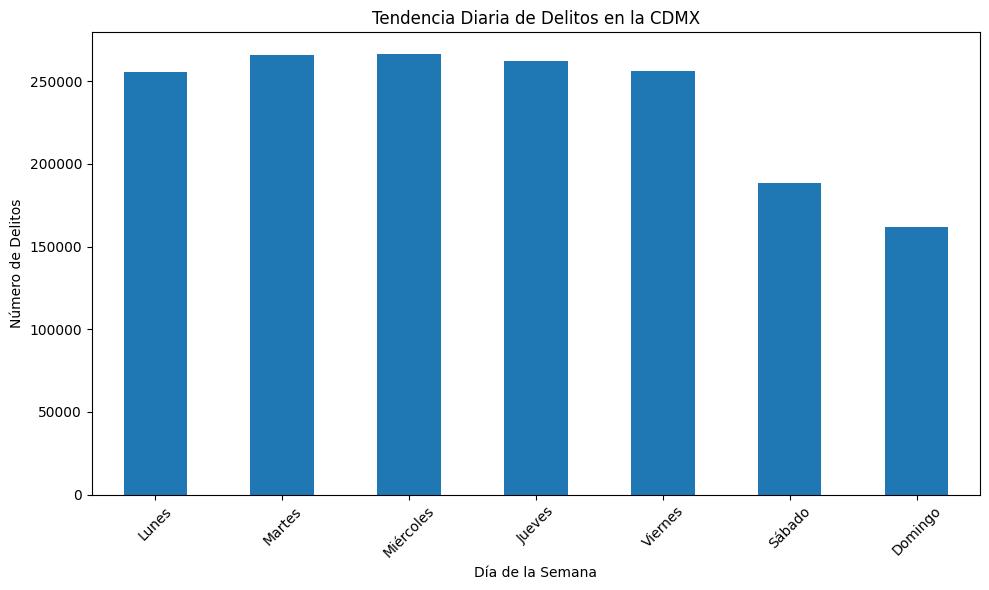

In [45]:
# Convertir la columna de fecha a tipo datetime

# Crear una columna adicional para el día de la semana (0=Lunes, 6=Domingo)
datos_corregidos['dia_semana'] = datos_corregidos['fecha'].dt.dayofweek

# Agrupar los delitos por día de la semana y contar las ocurrencias
delitos_por_dia = datos_corregidos.groupby('dia_semana').size()

# Graficar la tendencia diaria
plt.figure(figsize=(10, 6))
dias_semana = ['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo']
delitos_por_dia.index = dias_semana
delitos_por_dia.plot(kind='bar')
plt.title('Tendencia Diaria de Delitos en la CDMX')
plt.xlabel('Día de la Semana')
plt.ylabel('Número de Delitos')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#Pregunta 5.	¿Cuáles son los delitos que más caracterizan a cada alcaldía? Es decir, delitos que suceden con mayor frecuencia en una alcaldía y con menor frecuencia en las demás.

In [49]:
# Agrupar los delitos por alcaldía y tipo de delito, y contar las ocurrencias
delitos_por_alcaldia_tipo = datos_corregidos.groupby(['alcaldia_hechos', 'delito']).size().reset_index(name='ocurrencias')

# Encontrar el delito más característico de cada alcaldía
delitos_caracteristicos = delitos_por_alcaldia_tipo.groupby('alcaldia_hechos').apply(lambda x: x.loc[x['ocurrencias'].idxmax()])

# Imprimir los resultados
delitos_caracteristicos

,alcaldia_hechos,delito,ocurrencias
alcaldia_hechos,,,
ALVARO OBREGON,ALVARO OBREGON,VIOLENCIA FAMILIAR,14554
AZCAPOTZALCO,AZCAPOTZALCO,VIOLENCIA FAMILIAR,9380
BENITO JUAREZ,BENITO JUAREZ,FRAUDE,13860
CDMX,CDMX,FRAUDE,466
COYOACAN,COYOACAN,VIOLENCIA FAMILIAR,13057
CUAJIMALPA DE MORELOS,CUAJIMALPA DE MORELOS,VIOLENCIA FAMILIAR,3627
CUAUHTEMOC,CUAUHTEMOC,FRAUDE,25249
FUERA DE CDMX,FUERA DE CDMX,LESIONES INTENCIONALES POR ARMA DE FUEGO,1571
GUSTAVO A. MADERO,GUSTAVO A. MADERO,VIOLENCIA FAMILIAR,23617


In [51]:
# identificar los delitos que menos se presentan por alcaldia

# Encontrar el delito menos frecuente de cada alcaldía
delitos_menos_frecuentes = delitos_por_alcaldia_tipo.groupby('alcaldia_hechos').apply(lambda x: x.loc[x['ocurrencias'].idxmin()])

# Imprimir los resultados
delitos_menos_frecuentes

,alcaldia_hechos,delito,ocurrencias
alcaldia_hechos,,,
ALVARO OBREGON,ALVARO OBREGON,BIGAMIA,1
AZCAPOTZALCO,AZCAPOTZALCO,BIGAMIA,1
BENITO JUAREZ,BENITO JUAREZ,ASOCIACION DELICTUOSA,1
CDMX,CDMX,CAMBIO DE USO DE SUELO,1
COYOACAN,COYOACAN,COALICIÓN DE SERVIDORES PÚBLICOS,1
CUAJIMALPA DE MORELOS,CUAJIMALPA DE MORELOS,BIGAMIA,1
CUAUHTEMOC,CUAUHTEMOC,CALUMNIAS,1
FUERA DE CDMX,FUERA DE CDMX,CONTRA FUNCIONARIOS PUBLICOS,1
GUSTAVO A. MADERO,GUSTAVO A. MADERO,ATAQUES A LA PAZ PUBLICA,1


# Pregunta 6.	Diseña un indicador que mida el nivel de “inseguridad”. Genéralo al nivel de desagregación que te parezca más adecuado (ej. manzana, calle, AGEB, etc.). Analiza los resultados ¿Encontraste algún patrón interesante? ¿Qué decisiones se podrían tomar con el indicador?

In [73]:
# Para este caso, podremos realizar la opcion de identificar la hora donde se presentan mas delitos por alcaldia

# Redondear la columna "hora_hechos" para obtener las horas y crear la columna "hora_1"
datos_corregidos['hora_0'] = pd.to_datetime(datos_corregidos['hora_hechos'])
datos_corregidos['hora_1'] = datos_corregidos['hora_0'].dt.floor('H').dt.hour

# Agrupar los delitos por alcaldía, hora y contar las ocurrencias
delitos_por_alcaldia_hora = datos_corregidos.groupby(['alcaldia_hechos', 'hora_1']).size().reset_index(name='ocurrencias')

# Encontrar la máxima cantidad de delitos en una hora en una alcaldía
max_delitos = delitos_por_alcaldia_hora['ocurrencias'].max()

# Calcular el indicador de inseguridad como el porcentaje de delitos en cada hora y alcaldía respecto al máximo
delitos_por_alcaldia_hora['indicador_inseguridad'] = (delitos_por_alcaldia_hora['ocurrencias'] / max_delitos) * 100

# Imprimir los resultados
delitos_por_alcaldia_hora

<ipython-input-73-9cff7da568e4>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos_corregidos['hora_0'] = pd.to_datetime(datos_corregidos['hora_hechos'])
<ipython-input-73-9cff7da568e4>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos_corregidos['hora_1'] = datos_corregidos['hora_0'].dt.floor('H').dt.hour


,alcaldia_hechos,hora_1,ocurrencias,indicador_inseguridad
0,ALVARO OBREGON,0,2436,6.073904
1,ALVARO OBREGON,1,2244,5.595173
2,ALVARO OBREGON,2,2096,5.226151
3,ALVARO OBREGON,3,1961,4.889543
4,ALVARO OBREGON,4,1531,3.817384
...,...,...,...,...
427,XOCHIMILCO,19,2560,6.383085
428,XOCHIMILCO,20,2791,6.959058
429,XOCHIMILCO,21,2487,6.201067
430,XOCHIMILCO,22,2290,5.709869
